In [53]:
#Esta red neuronal básica busca aprender a convertir de grados Celsius a Fahrenheit
import os
import tensorflow as tf
import numpy as np

In [54]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [55]:
#En este caso la capa que crearemos será densa, lo que significa que está conectada a todas las capas, con una sola neurona
#input_shape se refiere a la dimensión de los datos que recibirá esta capa, que se espera que sean de dimensión 1
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

In [56]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss="mean_squared_error"
)

In [57]:
print("Comenzando entrenamiento")
historial=modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("modelo entrenado")

Comenzando entrenamiento
modelo entrenado


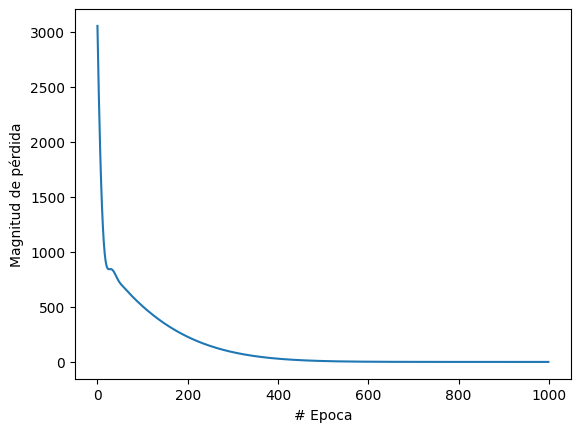

In [58]:
#Plotear el resultado de la función de pérdida (que tan mal están los resultados de la red en cada vuelta que dio)

import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

Se observa que no necesitamos 1000 vueltas, con 500 o 600 hubiese bastado ya que el error se mantiene relativamente estable luego de esto

In [59]:
print("Hagamos una predicción")
resultado = modelo.predict([100.0])
print("el resultado es" + str(resultado) + "fahrenheit")

Hagamos una predicción
1/1 [==============================] - 0s 79ms/step
el resultado es[[211.74315]]fahrenheit


In [60]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.7981988]], dtype=float32), array([31.92327], dtype=float32)]


Se observa que primeramente multiplica el valor original por 1.798 y luego le suma 31.927. Muy similar a la fórmula de conversión de celsius a fahrenheit (celsius * 1.8 + 32)

## ¿Qué ocurre si trato de resolver este mismo problema pero agregando más capas y neuronas a la red?

In [61]:
#En este caso agregaremos 2 capas intermedias con 3 neuronas y repetiremos el proceso
oculta1 = tf.keras.layers.Dense(units = 3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units = 3)
salida = tf.keras.layers.Dense(units = 1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [62]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss="mean_squared_error"
)

In [63]:
print("Comenzando entrenamiento")
historial=modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("modelo entrenado")

Comenzando entrenamiento
modelo entrenado


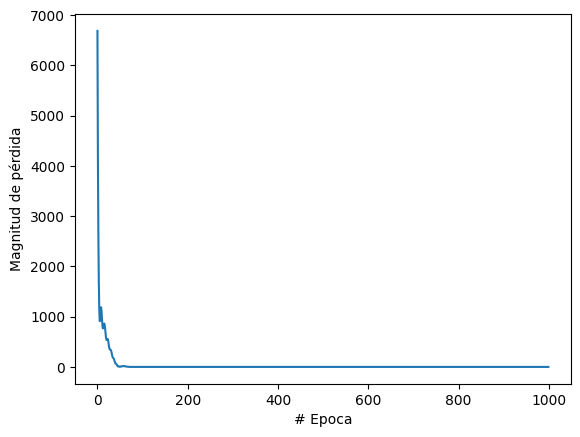

In [64]:
#Plotear el resultado de la función de pérdida (que tan mal están los resultados de la red en cada vuelta que dio)

import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [65]:
print("Hagamos una predicción")
resultado = modelo.predict([100.0])
print("el resultado es" + str(resultado) + "fahrenheit")

Hagamos una predicción
1/1 [==============================] - 0s 106ms/step
el resultado es[[211.7475]]fahrenheit


In [66]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.47993994, -0.98401695, -0.44309688]], dtype=float32), array([-1.758067 , -4.3827267,  1.654397 ], dtype=float32)]
[array([[ 0.02416543, -0.8466742 , -0.17400096],
       [ 0.2624906 , -1.8424659 , -0.65477973],
       [-0.27699003,  0.6534947 ,  0.47710103]], dtype=float32), array([3.500252, 4.633038, 2.845239], dtype=float32)]
[array([[0.6306409],
       [1.5145389],
       [0.5272698]], dtype=float32), array([4.0569234], dtype=float32)]
